# Phone call center data mining

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
df = pd.read_csv('phone_call.csv', index_col=0)

In [3]:
df.head()

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1.0
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7.0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1.0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1.0
4,10/11/2019,7:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37.0


## Data overview

In [4]:
df.shape

(355, 7)

In [5]:
df.dtypes

Date                        object
Start time                  object
From city                   object
To city                     object
Number called (to/from)     object
Call type                   object
Duration                   float64
dtype: object

In [6]:
df.describe()

,Duration
count,338.000000
mean,7.497041
std,10.205674
min,1.000000
25%,1.000000
50%,3.000000
75%,9.750000
max,87.000000


In [7]:
# nan percentage in 
df.isna().sum()/df.shape[0]

Date                       0.047887
Start time                 0.047887
From city                  0.047887
To city                    0.047887
Number called (to/from)    0.047887
Call type                  0.047887
Duration                   0.047887
dtype: float64

In [8]:
# drop nan
phone = df.dropna()

### Identify the 3 numbers with the most counts of outgoing calls

In [9]:
most = phone[phone['Call type'] == 'Outgoing'].groupby('Number called (to/from)').size().reset_index(name='counts')

In [10]:
most.sort_values('counts', ascending = False).head(3)

,Number called (to/from),counts
0,A_1,111
4,A_5,48
7,B_3,28


We can see A1, A5 and B3 are the suspect numbers call most to others.

### Identify the numbers with the least counts of outgoing calls

In [11]:
most.sort_values('counts', ascending = True).head(1)

,Number called (to/from),counts
15,D_1,1


We can see D1 is the suspect number call least to others, only once in these months.

### Highest and lowest total duration of outgoing calls

In [12]:
duration = phone[phone['Call type'] == 'Outgoing'].groupby('Number called (to/from)')[['Duration']].sum()

In [13]:
duration.sort_values('Duration', ascending = False).head(3)

,Duration
Number called (to/from),
A_1,1146.0
A_5,427.0
A_4,96.0


In [14]:
duration.sort_values('Duration', ascending = False).tail(1)

,Duration
Number called (to/from),
C_1,1.0


We can see A1, A5 and A4 have the longest calling duration, C1 has the lowest calling duration.

### Number of counts for every location of outgoing calls

In [15]:
location = phone[phone['Call type'] == 'Outgoing'].groupby('To city').size().reset_index(name='counts')

In [16]:
location.sort_values('counts', ascending = False)

,To city,counts
10,TORONTO ON,199
6,OAK RIDGES ON,28
7,RICHMONDHL ON,10
9,THORNHILL ON,3
0,800 SERV SERV 800 ON,1
1,866 SERV SERV 866 ON,1
2,877 SERV SERV 877 ON,1
3,888 SERV SERV 888 ON,1
4,AURORA ON,1
5,NEWMARKET ON,1


Here we can see Toronto is where suspect calls focus on.

### Incoming and Outgoing calls pattern

In [17]:
# extract the month from the date, still string type
phone['Month'] = phone.Date.apply(lambda x: x.strip()[:2])

In [18]:
phone.head()

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Month
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1.0,10
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7.0,10
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1.0,10
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1.0,10
4,10/11/2019,7:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37.0,10


In [19]:
month_in = phone[phone['Call type'] == 'Incoming'].groupby('Month')[['Duration']].sum()

In [20]:
month_in = month_in.rename(columns={'Duration':'Incoming'})

In [21]:
month_out = phone[phone['Call type'] == 'Outgoing'].groupby('Month')[['Duration']].sum()

In [22]:
month_out = month_out.rename(columns={'Duration':'Outgoing'})

In [23]:
month = pd.concat([month_in, month_out], axis = 1)

In [24]:
month

,Incoming,Outgoing
Month,,
07,84.0,190.0
08,54.0,281.0
09,244.0,714.0
10,63.0,621.0
11,87.0,196.0


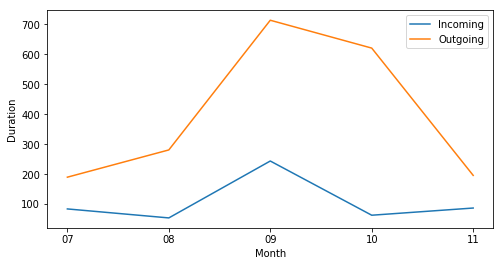

In [25]:
plt.figure(figsize=(8,4))
plt.plot(month.Incoming, label = 'Incoming')
plt.plot(month.Outgoing, label = 'Outgoing')
plt.ylabel('Duration')
plt.xlabel('Month')
plt.legend()

The phone line looks like that was used not for criminal activities or more like a personal phone because the incoming calls and outgoing calls duration more concentrates on Sept, maybe because of business. The pattern of incoming and outgoing is very similar, which means the phone line is likely to be personal phone.